# Advanced Programming Test 2

### By Ciniso Msibi - May22/comp/1423x

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [3]:
loan = df.drop(['Unnamed: 0.1', 'Unnamed: 0','loan_status', 'effective_date','due_date','education','Gender'], axis=1)

In [4]:
loan

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29
...,...,...,...
341,800,15,32
342,1000,30,25
343,800,15,39
344,1000,30,28


In [5]:
# Inspect the result
loan.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


### Data Visualization

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [7]:
def scatter_view(x, y, z, azim, elev):
    # Init figure and axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    
    # Compute scatter plot
    ax.scatter(x, y, z)
    ax.set_xlabel('Principal', fontsize=16)
    ax.set_ylabel('terms', fontsize=16)
    ax.set_zlabel('age', fontsize=16)
    
    # Specify azimuth
    # and elevation
    ax.azim = azim
    ax.elev = elev

In [8]:
# Draw interactive plot
xi = loan['Principal']
yi = loan['terms']
zi = loan['age']
interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev),
         azim=(0, 90), elev=(0, 90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

### Part 2: Euclidean Anomaly Detection

In [9]:
# Calculate the means
mu = loan.mean()

In [10]:
# Calculate the Euclidean distance
euclid_sq = np.square(loan - mu).sum(axis=1)
euclid = np.sqrt(euclid_sq)

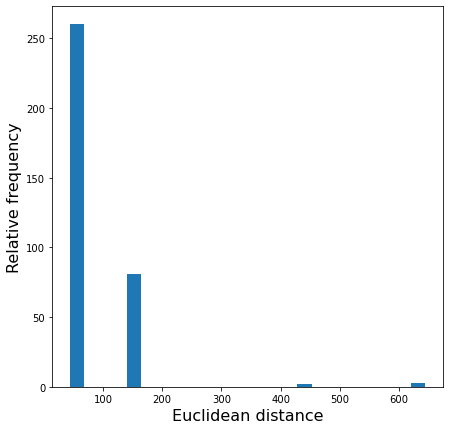

In [11]:
# Histogram of Euclidean distance
fig = plt.figure(figsize=(7, 7))
#SOLUTION:
plt.hist(euclid, 25)

plt.xlabel('Euclidean distance', fontsize=16)
plt.ylabel('Relative frequency', fontsize=16)
plt.show()

In [12]:
# Compute normalized Euclidean distance
max_euclid = euclid.max()
nmd_euclid = [float(x)/max_euclid for x in euclid]

### Visualizing the alarm rate

In [13]:
# Get alarm rate as a function
ecl_alarm_rate = []
nmd_range = np.linspace(0, 1, 400)
for nmd_decision in nmd_range:
    num_fail = (nmd_euclid > nmd_decision).sum()
    ecl_alarm_rate.append(float(num_fail) / len(euclid))

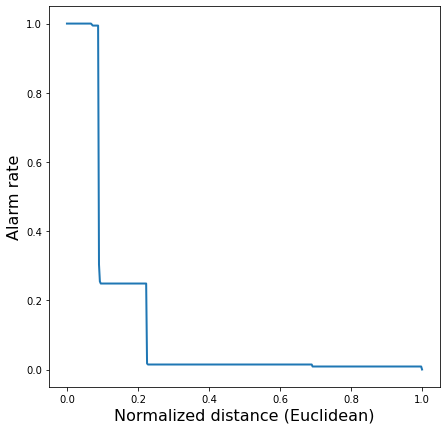

In [14]:
# Plot number of alarms
fig = plt.figure(figsize=(7, 7))
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)
plt.show()

### Select the decision boundary

In [15]:
# Select decision boundary
threshold = 0.1
index, ecl_threshold = next(tpl for tpl in enumerate(ecl_alarm_rate) if tpl[1] < threshold)
ecl_decision = nmd_range[index]

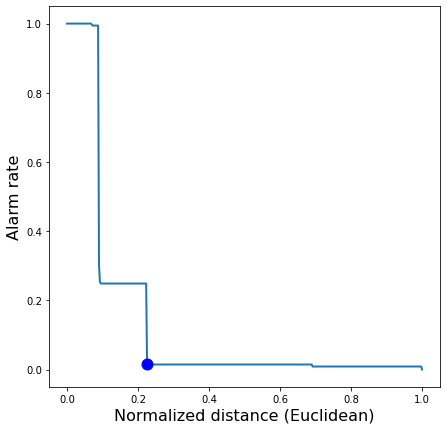

In [16]:
# Alarm rate with decision boundary
fig = plt.figure(figsize=(7, 7))
# SOLUTION:
# Plot the alarm rate as a function of the normalized euclidean distance
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
# Plot the chosen decision threshold and the curresponding alarm rate
plt.plot(ecl_decision, ecl_threshold, 'bo', markersize=11)

plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)
plt.show()

### Visualize the decision boundary in 3D.

In [17]:
# Decision sphere (Polar coordinates)
radius = ecl_decision * max_euclid
phi = np.linspace(0, 2 * np.pi, 300)
theta = np.linspace(0, 2 * np.pi, 300)

# Decision sphere (Cartesian coordinates)
xs = radius * np.outer(np.sin(theta), np.cos(phi))
ys = radius * np.outer(np.sin(theta), np.sin(phi))
zs = radius * np.outer(np.cos(theta), np.ones(np.size(phi)))

# Center decision sphere at mean
ecl_xd = xs + loan['Principal'].mean()
ecl_yd = ys + loan['terms'].mean()
ecl_zd = zs + loan['age'].mean()

C:\Users\Virus Msibi\AppData\Local\Temp\ipykernel_3712\1581958061.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


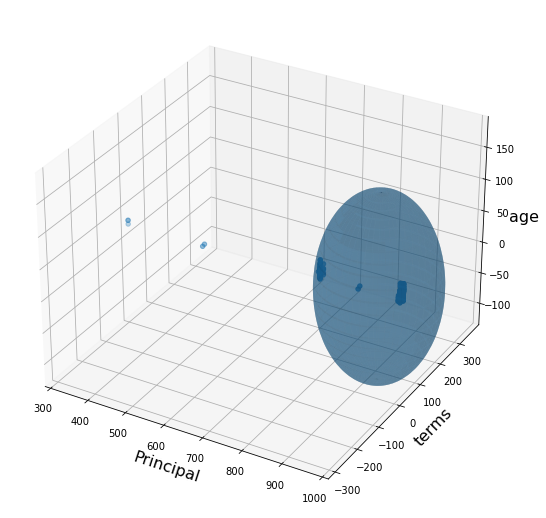

In [18]:
# Init figure and axes
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

# Plot data
ax.scatter(loan['Principal'],
           loan['terms'], 
           loan['age'])

# Plot decision boundary
ax.plot_surface(ecl_xd, ecl_yd, ecl_zd,
                linewidth=0, alpha=0.25)

# Label axes
ax.set_xlabel('Principal', fontsize=16)
ax.set_ylabel('terms', fontsize=16)
ax.set_zlabel('age', fontsize=16)
    
# --------------------------------------------------
# Set equal aspect ratio for all axes
# --------------------------------------------------

# Extreme values of x, y, z
extremes = []
extremes.append([loan['Principal'].min(),
                 loan['Principal'].max()])
extremes.append([loan['terms'].min(),
                 loan['terms'].max()])
extremes.append([loan['age'].min(),
                 loan['age'].max()])

# Half-widths and mid-points
hwidths = [(row[1] - row[0]) / 2.0 for row in extremes]
midpts = [(row[1] + row[0]) / 2.0 for row in extremes]

# Set xlim, ylim, zlim
left_ends = midpts - np.max(hwidths)
right_ends = midpts + np.max(hwidths)
ax.set_xlim([left_ends[0], right_ends[0]]);
ax.set_ylim([left_ends[1], right_ends[1]]);
ax.set_ylim([left_ends[2], right_ends[2]]);

## Deduce the loan anomaly detection algorithm

In [19]:
# The model is more accurate since the number of outliers are very low considering the algorithm's decision boundary.